In [31]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn 

In [32]:
from sklearn.datasets import make_blobs

X,y = make_blobs(centers = 4, random_state=8)
y = y% 2 # a % b = 
y

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

Text(0,0.5,'feature 1')

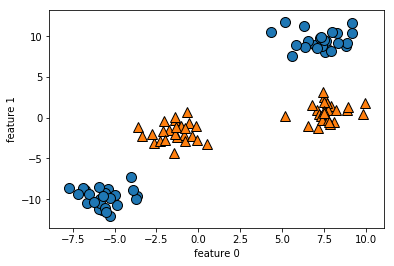

In [33]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("feature 0")
plt.ylabel("feature 1") 

Text(0,0.5,'feature 1')

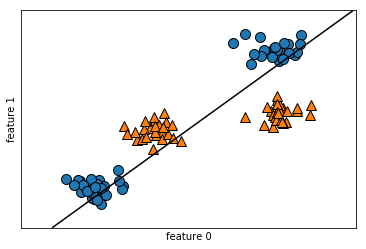

In [34]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("feature 0")
plt.ylabel("feature 1") # 직선만이 분류가 가능할까? 

In [35]:
# Add Feature2 as (Feature1 ^ 2) #

X_new = np.hstack([X,X[:,1:] ** 2]) # np.hstack? 

Text(0.5,0,'feature 1 ** 2')

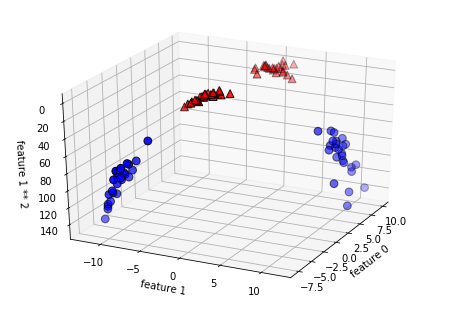

In [36]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()

# 3차원 그래프
ax = Axes3D(figure, elev = -152, azim= -26) 
# y==0인 포인트를 먼저 그린 후 y==1인 포인트를 그린다 
mask = y == 0
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60,edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker= '^',cmap=mglearn.cm2,s=60,edgecolor='k')
ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature 1 ** 2") 

In [37]:
# 이진 분류를 위한 선형 모델 생성 #

linear_svm_3d = LinearSVC().fit(X_new,y)

In [38]:
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_ 

Text(0.5,0,'feature**2')

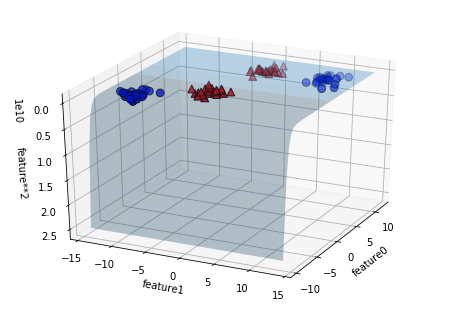

In [39]:
# 선형 결정 경계 그리기 #

figure = plt.figure()
ax = Axes3D(figure,elev=-152,azim=-26)
xx = np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2,50)
yy = np.linspace(X_new[:,1].min()-2, X_new[:,1].max()+2,50)

XX,YY = np.meshgrid(xx,yy)
ZZ = (coef[0]**XX + coef[1] * YY + intercept) / -coef[2] # ?
ax.plot_surface(XX,YY,ZZ,rstride= 8, cstride = 8, alpha=0.3)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c='b',cmap=mglearn.cm2,s=60,edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1],X_new[~mask,2],c='r',marker= '^',cmap=mglearn.cm2,s=60,edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature**2")

Text(0.5,0,'feature 1')

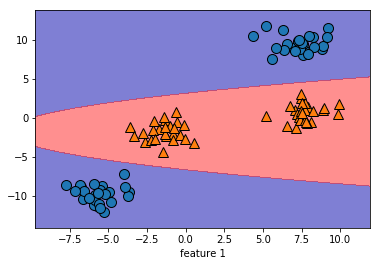

In [40]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()],
            cmap = mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("feature 0")
plt.xlabel("feature 1")

Text(0,0.5,'feature1')

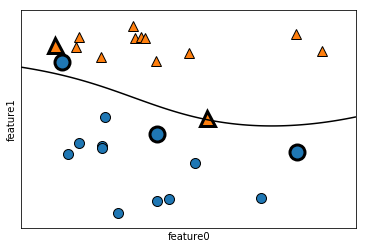

In [45]:
"""
(1) What is Kernel Technique? -> 130pp~131pp / Gaussian kenel(RBF : radial basis function)

(1)-1 : What is Probability Density Functions? 

We can divide Discrete and Continuous world
PDF in Continuous world is function that describes the relative likehood for Random Variable
to occur at given point in the observation space

(1)-2 : What is The Normal(Gaussian) Density Function?

Central Limit Theorem : 
Whenever a random variable is determined by a sequence of independent random events,
the outcome will be a Gaussian density function

(1)-3 : What is relationship between gamma and Distance of Data point?

The parameter gamma corresponds to the variance of the Gaussian density 
and controls the width of the neighborhood. 

(1)-4 : Nearest-neighbor methods vs Kernel methods 

What is Support Vector -> 131pp(with graph)

분류 결정은 어떻게 만들어지나? 

데이터 포인트 사이의 거리는 가우시안 커널에 의해 계산된다.

"""

from sklearn.svm import SVC
X,y = mglearn.tools.make_handcrafted_dataset() # 두 개의 클래스를 가진 인위적 데이터 생성
svm = SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
# support vector
sv = svm.support_vectors_
# dual_coef_의 부호에 따라 서포트 벡터의 클래스 레이블이 결정
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel("feature0")
plt.ylabel("feature1")

# graph 확인 --> 부드러운 곡선 생성 #

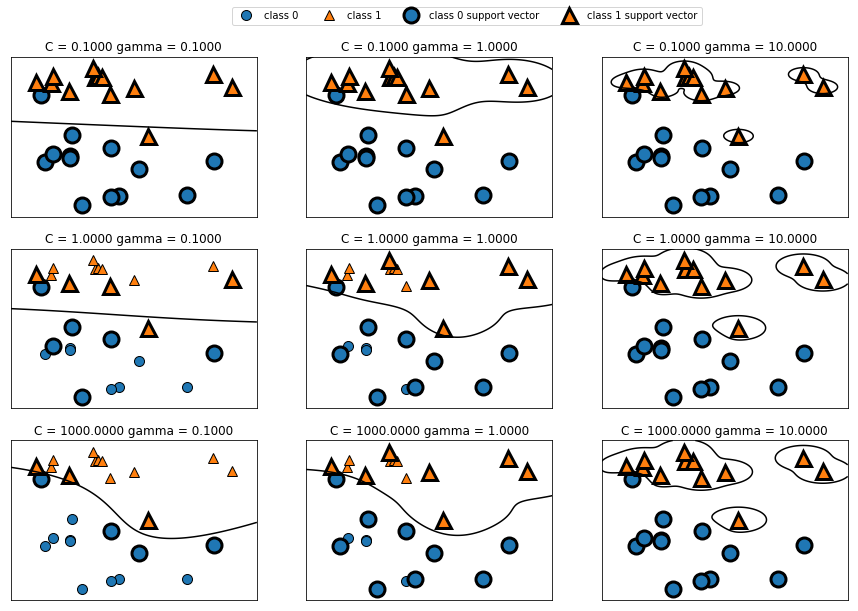

In [46]:
'''
C와 Gamma의 효과를 파악해 보기 --> 

'''
fig, axes = plt.subplots(3,3,figsize=(15,10))

for ax, C in zip(axes, [-1,0,3]):
    for a, gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma=gamma, ax=a)
    
axes[0,0].legend(["class 0","class 1","class 0 support vector","class 1 support vector"],ncol=4,loc=(0.9,1.2))

In [47]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)

svc = SVC() # default value : 'auto'(C=1 and gamma = 1 / X_train.shape(1))
svc.fit(X_train,y_train)

print("train accuracy = {}".format(svc.score(X_train,y_train)))
print("test accuracy = {}".format(svc.score(X_test,y_test))) # 너무 과대 적합

train accuracy = 1.0
test accuracy = 0.6293706293706294


Text(0,0.5,'feature size')

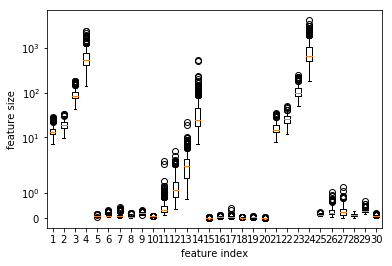

In [49]:
'''
svm에서 과대적합이 일어날 때는 어떻게 대응? --> 134pp~ 137pp

'''

plt.boxplot(X_train,manage_xticks=True) # manage_xticks = X축의 눈금 표시 여부
plt.yscale("symlog")
plt.xlabel("feature index")
plt.ylabel("feature size")

# log 스케일로 나타낸 feature_size의 자리수 확인 # 

In [50]:
'''
In kernel SVM one method is to transform all feature values between 0 and 1(135pp 하단) 
--> MinMaxScaler in sklearn.preprocessing.MinMaxScaler

나머지 세 가지 방법은?

'''

min_on_training = X_train.min(axis=0) # 특성별 최소값 
range_on_training = (X_train - min_on_training).max(axis=0) # 훈련 세트에서 특성별 (최대값 - 최소값) 범위 계산

X_train_scaled = (X_train - min_on_training) / range_on_training

print("특성별 최소 값 : \n{}".format(X_train_scaled.min(axis=0)))
print("특성별 최대 값 : \n{}".format(X_train_scaled.max(axis=0))) 

특성별 최소 값 : 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최대 값 : 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [51]:
# 테스트 세트에도 같은 작업을 하지만 훈련 세트에서 계산한 최솟값과 범위를 사용

X_test_scaled = (X_test - min_on_training) / range_on_training

print("특성별 최소 값 : \n{}".format(X_test_scaled.min(axis=0)))
print("특성별 최대 값 : \n{}".format(X_test_scaled.max(axis=0))) 

특성별 최소 값 : 
[ 0.03540158  0.04190871  0.02895446  0.01497349  0.14260888  0.04999658
  0.          0.          0.07222222  0.00589722  0.00105015 -0.00057494
  0.00067851 -0.0007963   0.05148726  0.01434497  0.          0.
  0.04195752  0.01113138  0.03678406  0.01252665  0.03366702  0.01400904
  0.08531995  0.01833687  0.          0.          0.00749064  0.02367834]
특성별 최대 값 : 
[0.76809125 1.22697095 0.75813696 0.64750795 1.20310633 1.11643038
 0.99906279 0.90606362 0.93232323 0.94903117 0.45573058 0.72623944
 0.48593507 0.31641282 1.36082713 1.2784499  0.36313131 0.77476795
 1.32643996 0.72672498 0.82106012 0.87553305 0.77887345 0.67803775
 0.78603975 0.87843331 0.93450479 1.0024113  0.76384782 0.58743277]


In [53]:
svc = SVC()
svc.fit(X_train_scaled,y_train)

print("train accuracy = {}".format(svc.score(X_train_scaled,y_train)))
print("test accuracy = {}".format(svc.score(X_test_scaled,y_test))) 

# 결과 해석 # 

train accuracy = 0.9483568075117371
test accuracy = 0.951048951048951


In [56]:
'''
C나 gamma값을 증가 시켜 좀 더 복잡한 모델을 생성할 수 있다.
'''
# C=1 -> C=1000 #

svc = SVC(C=1000)

svc.fit(X_train_scaled,y_train)

print("train accuracy = {}".format(svc.score(X_train_scaled,y_train)))
print("test accuracy = {}".format(svc.score(X_test_scaled,y_test))) 


train accuracy = 0.9882629107981221
test accuracy = 0.972027972027972


In [55]:
'''
Strength and Weakness of Kenel Support Vector Machine --> 137~138pp

'''





'\nStrength and Weakness of Kenel Support Vector Machine --> 137~138pp\n\n'